# Evaluation of performance of image compression methods


We compared different machine learning models against various "conventional" compression algorithms.


In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import json

### Load and Prepare Result dataframe

The dataframe, that is input to this notebook, is generated by running the script:
"RunMetricEvaluation.py".


In [152]:



df = pd.read_csv("./test.csv")
METRIC_NAMES = list(json.loads(df["Metrics"][0].replace("'", '"')).keys())
df.head()

,Unnamed: 0,DeepLearningModel,CompressionMethod,ReferenceFilePath,DecompressedFilePath,CompressedFilePath,FileSizeOriginal,FileSizeCompressed,Metrics,uqi,vifp,vsi,piqe,niqe,brisque
0,0,b2018-gdn-128-1,b2018-gdn-128-1,/home/pfeiffer/repos/Media-Data-Formats-PS/dee...,tmp/compressed_datasets/ImageCompressionBenchm...,tmp/compressed_datasets/ImageCompressionBenchm...,2002012,20990,"{'uqi': 0.9427231119834882, 'vifp': 0.25509412...",0.942723,0.255094,0.980070,41.846620,14.582889,42.229675
1,1,b2018-gdn-128-1,JPEGXR,/home/pfeiffer/repos/Media-Data-Formats-PS/dee...,tmp/compressed_datasets/ImageCompressionBenchm...,tmp/compressed_datasets/ImageCompressionBenchm...,2002012,73483,"{'uqi': 0.9646343399869176, 'vifp': 0.39304626...",0.964634,0.393046,0.993708,15.235099,18.638829,67.566589
2,2,b2018-gdn-128-1,JPEG,/home/pfeiffer/repos/Media-Data-Formats-PS/dee...,tmp/compressed_datasets/ImageCompressionBenchm...,tmp/compressed_datasets/ImageCompressionBenchm...,2002012,20255,"{'uqi': 0.8464493876959561, 'vifp': 0.15512186...",0.846449,0.155122,0.950349,41.627360,15.248457,97.786316
3,3,b2018-gdn-128-1,b2018-gdn-128-1,/home/pfeiffer/repos/Media-Data-Formats-PS/dee...,tmp/compressed_datasets/ImageCompressionBenchm...,tmp/compressed_datasets/ImageCompressionBenchm...,9227909,49400,"{'uqi': 0.9646380477972576, 'vifp': 0.24856921...",0.964638,0.248569,0.992348,50.374459,12.186429,37.643738
4,4,b2018-gdn-128-1,JPEGXR,/home/pfeiffer/repos/Media-Data-Formats-PS/dee...,tmp/compressed_datasets/ImageCompressionBenchm...,tmp/compressed_datasets/ImageCompressionBenchm...,9227909,163216,"{'uqi': 0.9754893098558703, 'vifp': 0.32756855...",0.975489,0.327569,0.997911,33.696295,10.349887,49.455750


In [153]:
# Use Reference image Name as own column - compute from path
def getRefNameFromPath(path):
    return path.split("/")[-1]
df["RefName"] = df["ReferenceFilePath"].apply(getRefNameFromPath)

In [154]:
# Drop unecessary columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [155]:
# Compute Comopression Rate
df["CompressionRate"] = df["FileSizeOriginal"] / df["FileSizeCompressed"]

In [156]:
# Make Multiindex column for metrics
m = {}
m["Metrics2"] = df[metric_names]
metric_df = pd.concat(m, axis=1)

metric_df.agg("mean")#pd.concat([df[df.columns.difference(metric_names)],metric_df], axis=1)

Metrics2  uqi         0.878203
          vifp        0.262908
          vsi         0.977883
          piqe       41.545731
          niqe       14.184635
          brisque    70.848339
dtype: float64

### Make Graphics 

In [157]:
df2 = df.copy()

df2 = df2.set_index(["DeepLearningModel", "RefName"])  # Set index to be able to sort by ML-Model and Reference Image

df2 = df2.loc["b2018-gdn-128-1",:]  # Select which model to have a look at!

Text(0.5, 0, 'Reference Image')

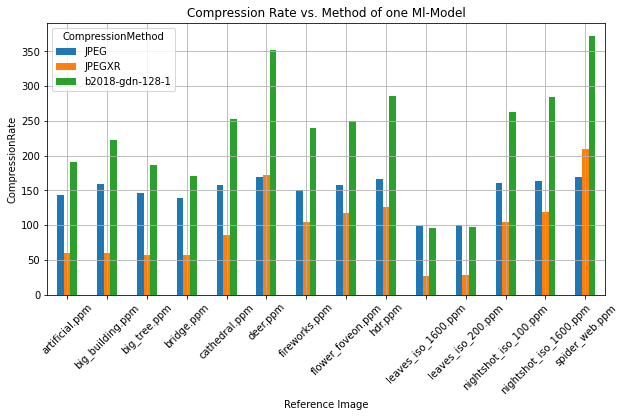

In [158]:
fig = plt.figure(figsize=(10,5))
ax = fig.subplots()
df.set_index(["RefName","CompressionMethod"]).unstack(-1).plot.bar( y="CompressionRate", rot=45,ax=ax)
ax.grid()
ax.set_title("Compression Rate vs. Method of one Ml-Model")
ax.set_ylabel("CompressionRate")
ax.set_xlabel("Reference Image")

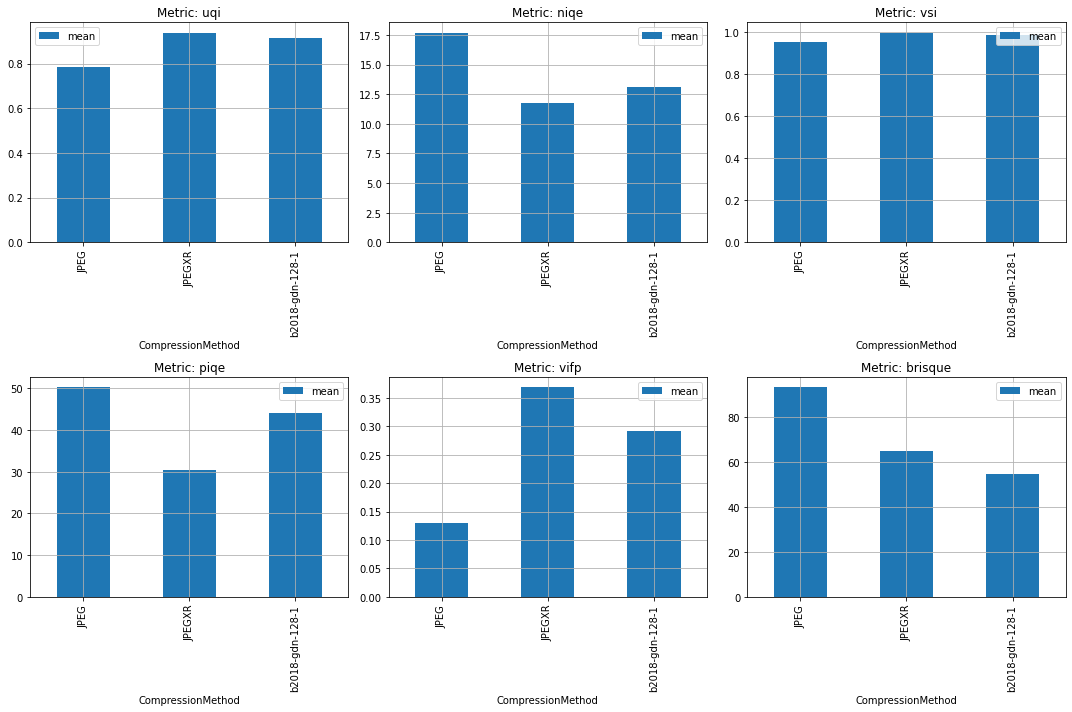

In [205]:
fig = plt.figure(figsize=(15,10))
ax = fig.subplots(2,3)
for it, m_name in enumerate(METRIC_NAMES):

    ax_it0 = it % 2
    ax_it1 = it % 3

    df2.groupby(["CompressionMethod"])[m_name].agg(["mean"]).plot.bar(ax=ax[ax_it0, ax_it1])
    ax[ax_it0, ax_it1].set_title(f"Metric: {m_name}")
    ax[ax_it0, ax_it1].grid()
fig.tight_layout()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)